# bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import researchpy as rp
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

# dados

* FlightDelays.csv


In [3]:
flightdelays = pd.read_csv(filepath_or_buffer="rawdata\FlightDelays.csv")

flightdelays.head()

,ID,Carrier,FlightNo,Destination,DepartTime,Day,Month,FlightLength,Delay,Delayed30
0,1,UA,403,DEN,4-8am,Fri,May,281,-1,No
1,2,UA,405,DEN,8-Noon,Fri,May,277,102,Yes
2,3,UA,409,DEN,4-8pm,Fri,May,279,4,No
3,4,UA,511,ORD,8-Noon,Fri,May,158,-2,No
4,5,UA,667,ORD,4-8am,Fri,May,143,-3,No


## Crosstab

In [4]:
# Contagem de dados cruzados

carriers = pd.crosstab(flightdelays['Carrier'], flightdelays['Delayed30'])
carriers 

Delayed30,No,Yes
Carrier,,
AA,2513,393
UA,919,204


## Bar plot

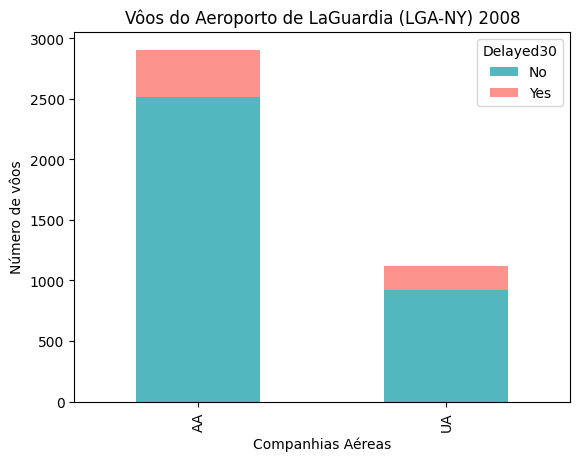

In [5]:
# Barplot matplotlib

carriers.plot(kind="bar", stacked= True, color=["#0899a5","#f7665a"], alpha= 0.7) # ou colormap=
plt.title("Vôos do Aeroporto de LaGuardia (LGA-NY) 2008")
plt.ylabel("Número de vôos")
plt.xlabel("Companhias Aéreas")
plt.show()


## Barplot seaborn

## Barplot interativo plotly

In [6]:
carriers_no_index = carriers.reset_index()
carriers_no_index

Delayed30,Carrier,No,Yes
0,AA,2513,393
1,UA,919,204


In [7]:
fig = px.bar(carriers_no_index, x='Carrier', y=['No','Yes'], color_discrete_sequence=["#0899a5","#f7665a"], opacity= 0.7)
fig.update_layout(template= "plotly_white")
#fig.write_html("carries_delay_laguardia.html", auto_open = True)
fig.show()


c:\Users\eduar\OneDrive\Documentos\eBookLibrary\chihara_2018\.conda\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


## Crosstab (%)

In [8]:
# Cruzamento de dados (percentual)

def percent_contingency(data, col1, col2, type):
    cont_table = pd.crosstab(data[col1], data[col2], normalize= type) * 100
    return cont_table.map(lambda x: f'{x:.2f}%')

percent_contingency(flightdelays, 'Carrier','Delayed30',"index")

Delayed30,No,Yes
Carrier,,
AA,86.48%,13.52%
UA,81.83%,18.17%


## Histograma

In [9]:
# distribuição dos atrasos da united airlines (UA) por classe

ua_delays = flightdelays.loc[flightdelays['Carrier']=='UA','Delay']

bins = range(-50,400,50)

ua_delays_hist_data = pd.cut(x= ua_delays, bins= bins).value_counts()

ua_delays_hist_data

Delay
(-50, 0]      722
(0, 50]       249
(50, 100]      86
(100, 150]     39
(150, 200]     14
(200, 250]      7
(250, 300]      3
(300, 350]      2
Name: count, dtype: int64

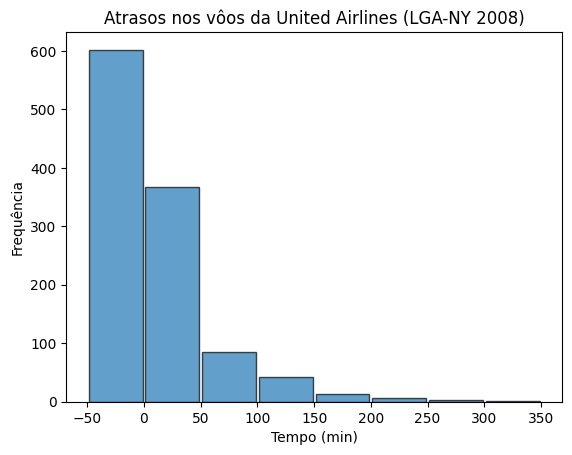

In [10]:
# Histograma
 
plt.hist(ua_delays, bins=bins, edgecolor = "black", rwidth=0.95, alpha = 0.7)
plt.title("Atrasos nos vôos da United Airlines (LGA-NY 2008)")
plt.ylabel("Frequência")
plt.xlabel("Tempo (min)")

plt.show()

## Histograma interativo

In [11]:
fig = px.histogram(ua_delays, 
                   x= "Delay", 
                   color_discrete_sequence=['#1f77b4'],
                   nbins= len(bins),                     
                   opacity= 0.7, 
                   title= "Atrasos nos vôos da United Airlines (LGA-NY 2008)")
fig.update_layout(bargap = 0.05, width = 800,height = 600, template = "ggplot2")
fig.update_yaxes(title_text= "Frequência")
fig.update_xaxes(title_text= "Tempo (min)")
fig.update_traces(marker_line_width=1,marker_line_color="black")
fig.show()

### dot plot

# Numeric Summaries

## Média e mediana

In [ ]:
ua_delays.agg(['mean','median'], axis='index')

mean      15.983081
median    -1.000000
Name: Delay, dtype: float64

## Trimmed mean

In [ ]:
ex2_1 = [1,3,3,4,4,7,8,10,14,21,21,26]
stats.trim_mean(ex2_1,proportiontocut=0.25) # em scipy.stats

7.833333333333333

## Summary statistics


In [ ]:
recidivism = pd.read_csv(filepath_or_buffer='rawdata\Recidivism.csv')
recidivism.head()

,Gender,Age,Age25,Race,Offense,Recid,Type,Days
0,M,Under 25,Under 25,White-NonHispanic,Felony,Yes,Tech,16.0
1,M,55 and Older,Over 25,White-NonHispanic,Felony,Yes,Tech,19.0
2,M,25-34,Over 25,White-NonHispanic,Felony,Yes,Tech,22.0
3,M,55 and Older,Over 25,White-NonHispanic,Felony,Yes,Tech,25.0
4,M,25-34,Over 25,Black-NonHispanic,Felony,Yes,Tech,26.0


In [ ]:
rp.summarize(data= recidivism['Days'], stats= ["N", "Mean", "Median", "Variance", "SD", "SE", "CI", 'Min', 'Max', 'Range', "Kurtosis", "Skew"], decimals=2)

,Name,N,Mean,Median,Variance,SD,SE,95% Conf. Interval,Min,Max,Range,Kurtosis,Skew
0,Days,5386,473.33,418.0,80167.88,283.14,3.86,"[465.76, 480.89]",0.0,1095.0,1095.0,2.16,0.46


## Sumário descritivo das informações do Dataframe

In [ ]:
rp.codebook(recidivism)

Variable: Gender    Data Type: object 

 Number of Obs.: 17022 
 Number of missing obs.: 3 
 Percent missing: 0.02 
 Number of unique values: 2 

 Data Values and Counts: 
 
 Values  Frequency
     F       2101
     M      14918




Variable: Age    Data Type: object 

 Number of Obs.: 17022 
 Number of missing obs.: 3 
 Percent missing: 0.02 
 Number of unique values: 5 

 Data Values and Counts: 
 
       Values  Frequency
       25-34       6227
       35-44       4035
       45-54       2872
55 and Older        808
    Under 25       3077




Variable: Age25    Data Type: object 

 Number of Obs.: 17022 
 Number of missing obs.: 3 
 Percent missing: 0.02 
 Number of unique values: 2 

 Data Values and Counts: 
 
   Values  Frequency
 Over 25      13942
Under 25       3077




Variable: Race    Data Type: object 

 Number of Obs.: 17022 
 Number of missing obs.: 34 
 Percent missing: 0.2 
 Number of unique values: 10 

 Data Values and Counts: 
 
                                    

## Boxplot

In [ ]:
ua_flights = flightdelays.loc[flightdelays['Carrier']=='UA',:]
ua_flights.head()

,ID,Carrier,FlightNo,Destination,DepartTime,Day,Month,FlightLength,Delay,Delayed30
0,1,UA,403,DEN,4-8am,Fri,May,281,-1,No
1,2,UA,405,DEN,8-Noon,Fri,May,277,102,Yes
2,3,UA,409,DEN,4-8pm,Fri,May,279,4,No
3,4,UA,511,ORD,8-Noon,Fri,May,158,-2,No
4,5,UA,667,ORD,4-8am,Fri,May,143,-3,No


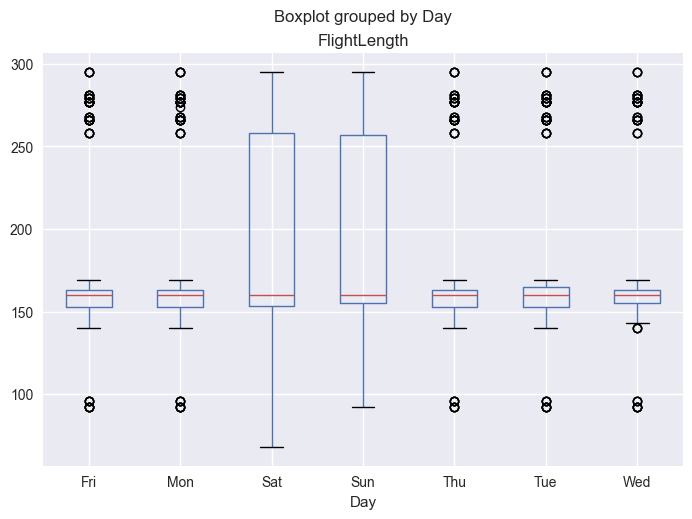

In [ ]:
# consulte estilos em plt.style.available
plt.style.use('seaborn-v0_8')
ua_flights.boxplot(column='FlightLength', by= 'Day')
plt.show()

## Box plot Seaborn

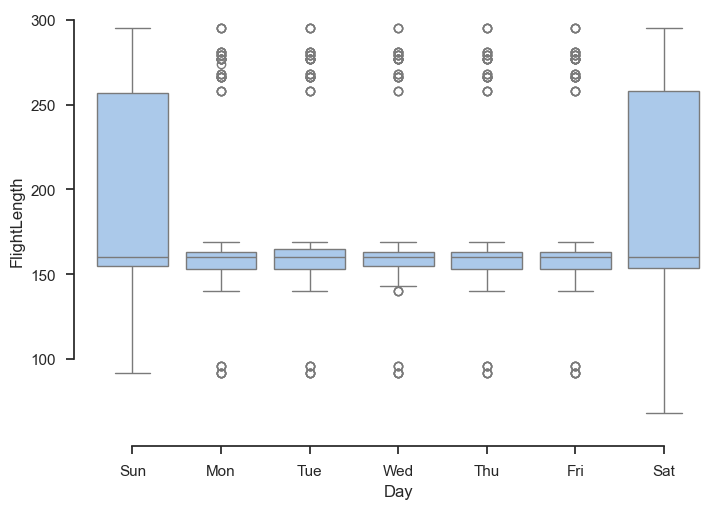

In [ ]:
sns.set_theme(style="ticks", palette="pastel")

# Dados
ua_flights

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="Day", y="FlightLength",
            order= ['Sun', 'Mon', 'Tue', 'Wed', 'Thu','Fri', 'Sat'],
            #hue="smoker", palette=["m", "g"],
            data=ua_flights)
sns.despine(offset=10, trim=True)

## Quantiles and Normal quantile plots

<Axes: xlabel='Weight', ylabel='Density'>

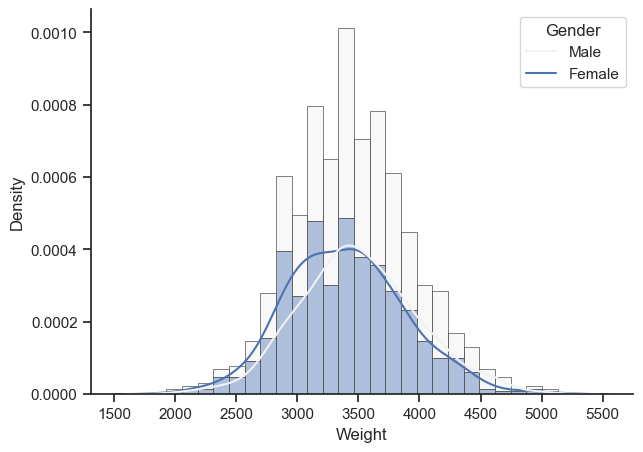

In [59]:
sns.set_theme(style="ticks")


# Dados 
ncbirths2004 = pd.read_csv(r'rawdata\NCBirths2004.csv')

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    ncbirths2004,
    x="Weight",
    hue="Gender",
    multiple="stack",
    palette="light:b",
    edgecolor=".3",
    linewidth=.5,
    alpha = 0.45,
    stat= "density"    
)
sns.kdeplot(data=ncbirths2004,
    x="Weight",
    hue="Gender", palette="light:b", ax=ax)



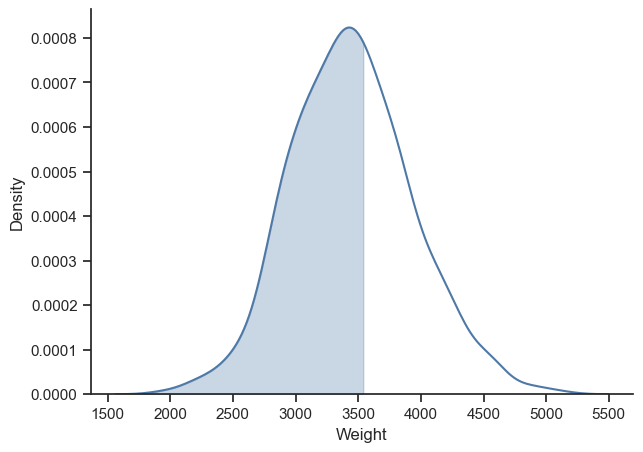

In [71]:
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
sns.kdeplot(data=ncbirths2004,
            x = "Weight",
            color = '#4e79a7', 
            
            ax=ax)
x = ax.lines[-1].get_xdata()
x_densidade = np.percentile(ncbirths2004['Weight'], 60)
y = ax.lines[-1].get_ydata()


ax.fill_between(x, 0, y, where=x < x_densidade, color='#4e79a7', alpha=0.3)

<Axes: xlabel='teorico', ylabel='real'>

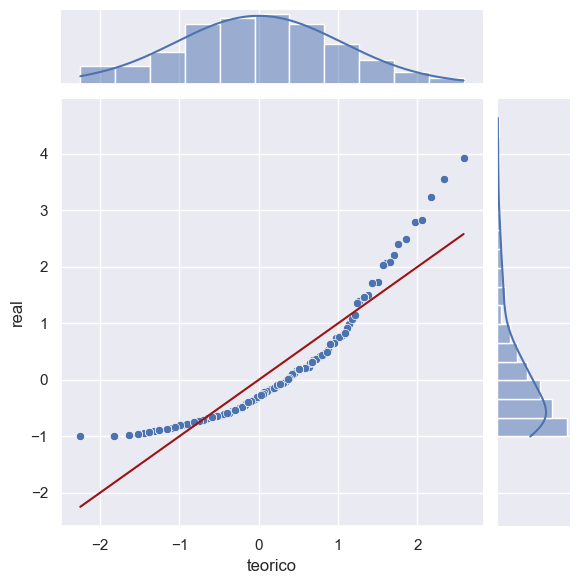

In [179]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import norm 
import seaborn as sns

# dados
ua_delayed30_delays = flightdelays.loc[(flightdelays['Carrier']=="UA") & (flightdelays['Delayed30']=='Yes'),'Delay']

# obter rankings (decimal)
data_rank_pct = ua_delayed30_delays.rank(pct= True)

# obter quantis teóricos correspondentes ao ranking decimal
quantis_teoricos = norm.ppf(data_rank_pct)

# Padronizar os valores reais (z-scores)
quantis_reais = stats.zscore(ua_delayed30_delays)

# arrumar os dados como dataframe
qq_data = pd.DataFrame({'real':quantis_reais,'teorico':quantis_teoricos})

# temática do gráfico
sns.set_theme(style="darkgrid")

# plotar pares real x teorico
sns.jointplot(x= "teorico", 
              y= "real",
              data= qq_data, 
              kind= "scatter",
              marginal_kws= dict(kde= True))
                  
# plotar linha de referência (z-score teorico)
sns.lineplot(data= qq_data, x= 'teorico', y= 'teorico', color= '#9e1316')


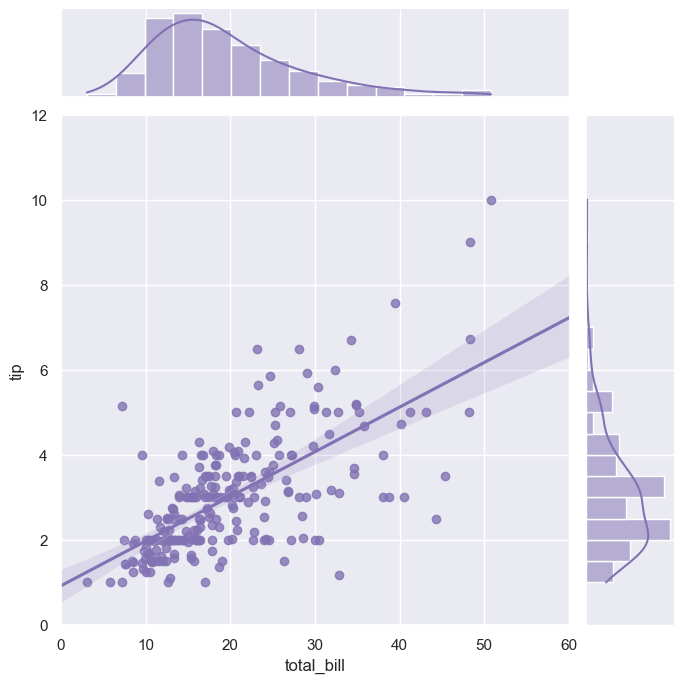

In [73]:
import seaborn as sns

sns.set_theme(style="darkgrid")

tips = sns.load_dataset("tips")
g = sns.jointplot(x="total_bill", y="tip", data=tips,
                  kind="reg", truncate=False,
                  xlim=(0, 60), ylim=(0, 12),
                  color="m", height=7)